#1. 2주차

## I. ANN from Scratch

In [ ]:
import numpy as np

In [ ]:
#Independent variables
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1) #to convert labels to vector

In [ ]:
#Parameter
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 #learning rate

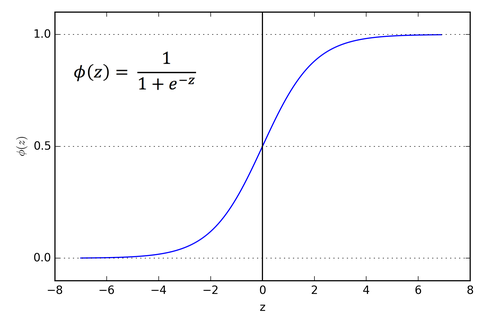

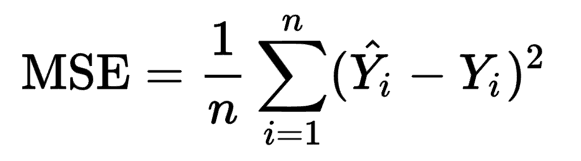

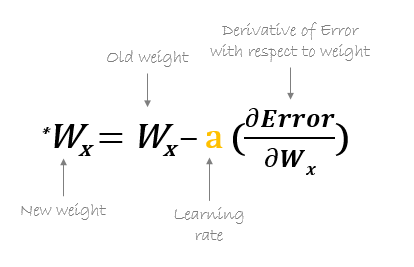

In [ ]:
#Activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
#2000 epoch

for epoch in range(2000):
    inputs = input_set
#forward propagation
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)

#error
    error = z - labels
    print(error.sum())

#역전파
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
#가중치 조정
    weights = weights - lr*np.dot(inputs, z_del)
    for num in z_del:
        bias = bias - lr*num

In [ ]:
#예측
single_pt = np.array([0,1,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.9122281]


##2. Tensor Flow로 ANN 연습

1. 필요 패키지 불러오기

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

2. 데이터 전처리 연습 ***

In [ ]:
df = pd.read_csv("creditset2.csv")

#데이터를 둘(각각 train, test)로 나눠주는 함수, test size 비율만큼 test에 해당하는 데이터의 크기
train_test_split([1,2,3,4], test_size=0.2)

#함수에 들어간 입력의 개수 X 2 만큼의 결과가 순서대로 나옴, train, test 각각
train_test_split(df, test_size=0.2)

#각각 다른 이름으로 할당시킬 수 있음
train_df, test_df = train_test_split(df, test_size=0.2)


#데이터프레임인 df에서 컬럼 선택: df[ [ 컬럼이름을 여기에  ]    ]
x = df[['income', 'age', 'loan']] #해당 컬럼 3개를 갖는 데이터프레임
y = df[['default10yr']] #해당 컬럼을 갖는 데이터프레임

#One hot encoding
y = to_categorical(df[['default10yr']]) #One hot encoding 시키기

#scaling
x = MinMaxScaler().fit_transform(x) #스케일링 시키기

3. 데이터 읽고 전처리까지 (분류모형의 경우)

In [ ]:
df = pd.read_csv("creditset2.csv")  # 1) 데이터 읽기
x = df[['income', 'age', 'loan']]   # 2) 변수 선택, x
y = to_categorical(df[['default10yr']]) #3) 변수 선택, target 범주형의 원핫인코딩
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2) #4) 파티셔닝
train_x = MinMaxScaler().fit_transform(train_x) #5)파티셔닝된 것 중 X의 스케일링
test_x = MinMaxScaler().fit_transform(test_x) #5)파티셔닝된 것 중 X의 스케일링

4. 모델링 및 적합 ***

In [ ]:
#DNN
from tensorflow.keras.models import Sequential       # 이런 곳 말고 치사하니까
from tensorflow.keras.layers import Dense

#Hidden layer 구성하기           # 이런 곳 아래 다 중요
model = Sequential()
model.add(Dense(3, activation = 'relu', input_shape = (3, ))) #첫번째 은닉층, 3개입력->2개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(6, activation = 'relu')) #두번째 은닉층, 2개입력->6개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(2, activation = 'softmax')) #Desnse: 마지막 은닉층, Fully connected hidden layer, 분류의 경우 softmax

#모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc']) #분류모형은 이대로 사용하기
model.summary()

#모형 학습 및 가중치 확인
model.fit(train_x,train_y,epochs = 20)  #epoch수를 조정


5. 결과확인 및 평가

In [ ]:
#np.argmax
print( np.argmax( [1,10,100]) )

a = np.arange(6).reshape(2,3) + 10
print(a)
print(np.argmax(a, axis=0))#열에서 최대값, index
print(np.argmax(a, axis=1))#행에서 최대값, index 반환

2
[[10 11 12]
 [13 14 15]]
[1 1 1]
[2 2]


In [ ]:
# ***
predicted = model.predict( test_x)
predicted2 = np.argmax(predicted, axis=-1)
actual = np.argmax(test_y, axis=-1)

print("Accuracy:", np.mean(predicted2 == actual))


Accuracy: 0.9275


In [ ]:
model.summary()
print( model.get_weights() ) #가중치 확인


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
[array([[-0.5092614 ,  0.7060958 , -0.02716669],
       [-1.0899689 ,  0.718363  , -0.27758577],
       [ 1.3789079 , -0.3581793 ,  0.8539818 ]], dtype=float32), array([ 0.42849433, -0.00488074, -0.01490956], dtype=float32), array([[ 1.5223528 , -0.7409276 , -0.34967428, -0.39777082, -0.46992132,
        -0.35032475],
    

In [ ]:
#분류 보고서 # 기본이라고 함 # ***
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(actual, predicted2))


               precision    recall  f1-score   support

           0       0.94      0.97      0.96       336
           1       0.83      0.69      0.75        64

    accuracy                           0.93       400
   macro avg       0.89      0.83      0.85       400
weighted avg       0.92      0.93      0.92       400



#2. 3-4주차

##1. MNIST 데이터셋에 대한 DNN

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.reshape(60000, 28*28).reshape( 60000, 28, 28)

In [ ]:
# reshape and minmax scaling ***
x_train = x_train.reshape((60000, 28 * 28)) / 255.0   #3d->2d, minmax scaling
x_test = x_test.reshape((10000, 28 * 28)) / 255.0

In [ ]:
y_train =  tf.keras.utils.to_categorical(y_train, 10)
y_test =  tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Sequential model
model = tf.keras.models.Sequential()

# Stacking layers
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
#              loss=keras.losses.categorical_crossentropy)

In [ ]:
model.fit(x_train, y_train,  epochs=5, verbose=1,
          validation_split=0.2)
# ***

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3190 - accuracy: 0.9035 - val_loss: 0.1386 - val_accuracy: 0.9595
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1222 - accuracy: 0.9626 - val_loss: 0.1132 - val_accuracy: 0.9649
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0872 - accuracy: 0.9726 - val_loss: 0.1034 - val_accuracy: 0.9672
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0929 - val_accuracy: 0.9732
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.1068 - val_accuracy: 0.9695


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9720


[0.09406383335590363, 0.972000002861023]

79/79 [==============================] - 0s 2ms/step


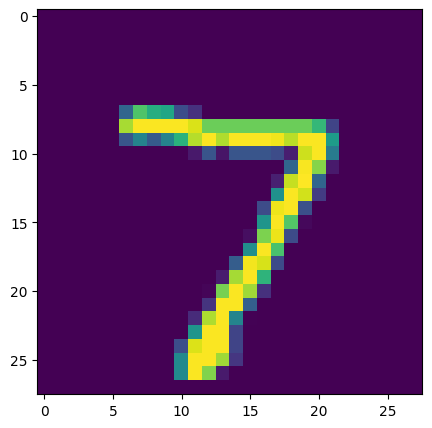

In [ ]:
preds = model.predict(x_test, batch_size=128)
preds[0]
np.argmax(preds[0])
plt.imshow(x_test[0].reshape(28, 28))
plt.show()

In [ ]:
# Save the entire model to a HDF5 file.         ***
model.save('mnist_dnn_model.h5')
new_model = tf.keras.models.load_model('mnist_dnn_model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##2. DNN 하이퍼 파라미터 튜닝

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt      ***

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [ ]:
label_train = tf.keras.utils.to_categorical(label_train, 10)
label_test = tf.keras.utils.to_categorical(label_test, 10)

- 하이퍼튜닝을 위한 모형 구축 시 하이퍼 파라미터 탐색 공간 정의
- 하이퍼 모델: 하이퍼튜닝을 위해 설정하는 모델

- 하이퍼 모형의 설정
 - 모델 빌더 함수 사용: Keras Tuner API의 HyperModel 클래스를 하위 클래스화
 - 컴파일된 모델을 반환하고 인라인으로 정의한 하이퍼파라미터를 사용하여 모델을 하이퍼튜닝

In [ ]:
# 아래 너무 어려워서 시험에는 nono

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))   #reshape 2d image ->1d row

  hp_units = hp.Int('units', min_value=4, max_value=12, step=4)
  model.add(keras.layers.Dense(units=hp_units, activation='relu' ))
  model.add(keras.layers.Dense(10, activation="softmax"))

  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = "categorical_crossentropy",  #sparse_categorical_crossentropy와 categorical_crossentropy의 차이는 타겟의 OHE여부
                metrics = ['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_accuracy", "max"), #objective=kt.Objective("val_loss", "min"),
                     max_epochs=3,
                     directory='my_dir',
                     project_name='intro_to_kt2')

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback): #조기 학습 중단을 위해 사용
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
#하이퍼 파라미터 탐색 실행, model.fit과 동일
tuner.search(img_train, label_train, epochs=10, validation_split=0.1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 6 Complete [00h 00m 20s]
val_accuracy: 0.8328333497047424

Best val_accuracy So Far: 0.8443333506584167
Total elapsed time: 00h 01m 21s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
optimal number of units:  {best_hps.get('units')}
optimal learning rate for the optimizer:  {best_hps.get('learning_rate')}
""")


optimal number of units:  12
optimal learning rate for the optimizer:  0.001



In [ ]:
label_train.shape

(60000, 10)

In [ ]:
#탐색을 통해 찾은 하이퍼파라미터로 훈련 시 최적의 epoch을 발견
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1531 - accuracy: 0.5257 - val_loss: 0.9071 - val_accuracy: 0.6159
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8896 - accuracy: 0.6235 - val_loss: 0.8651 - val_accuracy: 0.6239
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8608 - accuracy: 0.6372 - val_loss: 0.8583 - val_accuracy: 0.6555
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8454 - accuracy: 0.6495 - val_loss: 0.8363 - val_accuracy: 0.6505
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8306 - accuracy: 0.6566 - val_loss: 0.8526 - val_accuracy: 0.6586
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8168 - accuracy: 0.6778 - val_loss: 0.8315 - val_accuracy: 0.7053
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7956 - accuracy: 0.7071 - val_loss: 0.9552 - val_accuracy:

In [ ]:
#최적 모형 객체 만들기
hypermodel = tuner.hypermodel.build(best_hps)

# 최적 epoch으로 학습
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/9
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7401 - accuracy: 0.7392 - val_loss: 0.5314 - val_accuracy: 0.8142
Epoch 2/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4873 - accuracy: 0.8319 - val_loss: 0.4690 - val_accuracy: 0.8378
Epoch 3/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4536 - accuracy: 0.8432 - val_loss: 0.4523 - val_accuracy: 0.8447
Epoch 4/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8458 - val_loss: 0.4552 - val_accuracy: 0.8399
Epoch 5/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4278 - accuracy: 0.8505 - val_loss: 0.4467 - val_accuracy: 0.8418
Epoch 6/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.8536 - val_loss: 0.4709 - val_accuracy: 0.8345
Epoch 7/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4166 - accuracy: 0.8525 - val_loss: 0.4327 - val_accuracy: 0.8500

In [ ]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.8398
[test loss, test accuracy]: [0.46148985624313354, 0.8398000001907349]


#3. 5주차

## Cifar-10 데이터셋으로 분류모형 생성
- MLP 생성
- 실제 사진에 적용
- test-car.jpg를 업로드해서 분류
- 구글 등에서 자동차, 배, 비행기 사진을 jpg로 다운로드하셔서 적용

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.reshape(50000, 32*32*3)/255

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [ ]:
y_train.shape

(50000, 1)

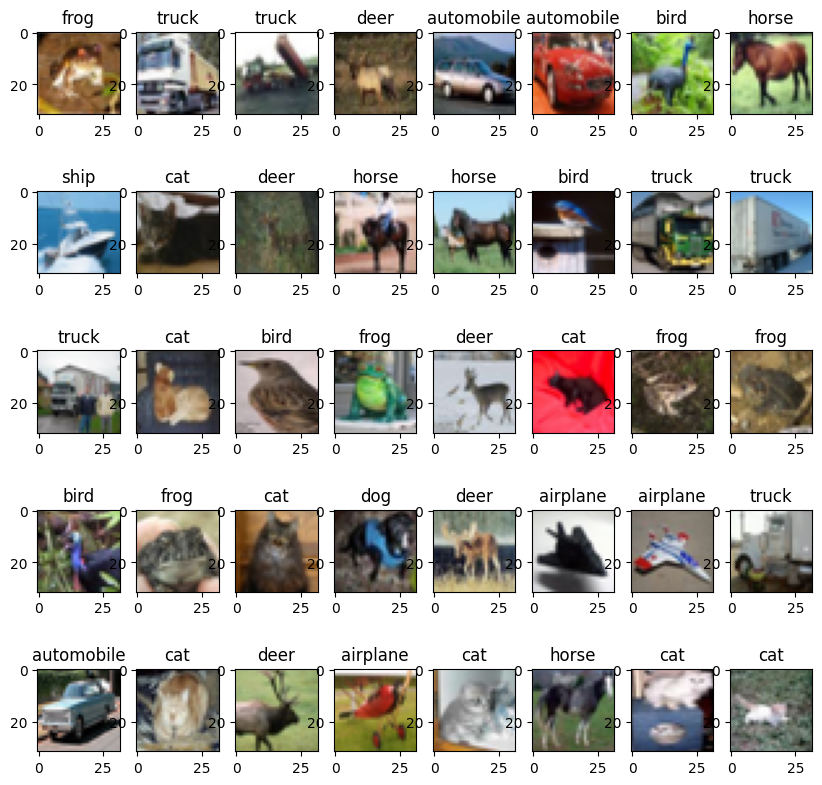

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
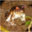

In [ ]:
X_train[0]

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3 #3072

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 2차원 배열로 변환하기 --- (*2)       *** 의미
X_train = X_train.reshape(50000,3072).astype('float32') / 255
X_test = X_test.reshape(10000, im_size).astype('float32') / 255


In [ ]:
X_train[0]

array([0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
       0.28235295], dtype=float32)

In [ ]:
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_train.shape

(50000, 10)

In [ ]:
# 모델 정의하기 --- (*3)    ***
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 --- (*4)  ***
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)    ***
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)



Epoch 1/5
1407/1407 [==============================] - 11s 5ms/step - loss: 1.8967 - accuracy: 0.3091 - val_loss: 1.8578 - val_accuracy: 0.3196
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7087 - accuracy: 0.3851 - val_loss: 1.6472 - val_accuracy: 0.4086
Epoch 3/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6201 - accuracy: 0.4189 - val_loss: 1.6079 - val_accuracy: 0.4232
Epoch 4/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5622 - accuracy: 0.4413 - val_loss: 1.5977 - val_accuracy: 0.4228
Epoch 5/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5154 - accuracy: 0.4557 - val_loss: 1.5471 - val_accuracy: 0.4536


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 [==============================] - 4s 14ms/step - loss: 1.5436 - accuracy: 0.4502
정답률= 0.45019999146461487 loss= 1.5435658693313599


In [ ]:
hist.history['accuracy']

[0.29855555295944214,
 0.3813999891281128,
 0.41306665539741516,
 0.43302223086357117,
 0.4526444375514984]

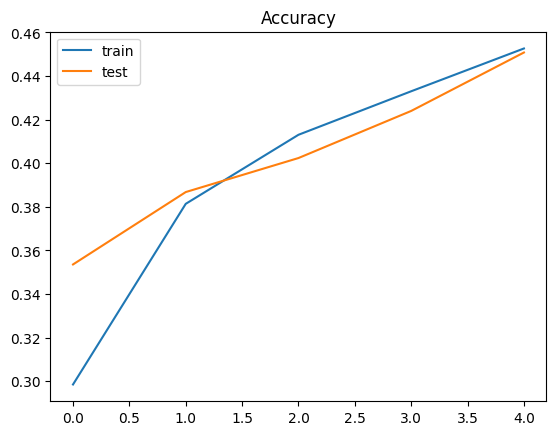

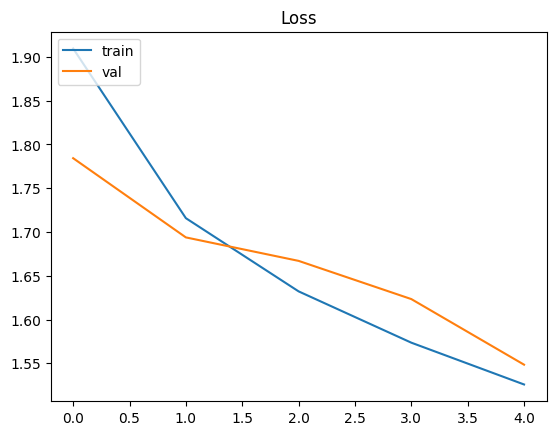

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)         *** 해석
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 모형 저장: 가중치의 저장

In [ ]:
model.save_weights('cifar10-weight.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 3746122 (14.29 MB)
Trainable params: 3746122 (14.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 실제 사진에의 적용

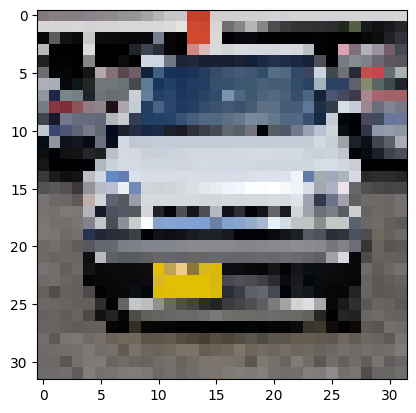

In [ ]:
import cv2  #PIL
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('test-car.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 [==============================] - 0s 107ms/step


In [ ]:
r

array([[0.10589333, 0.67802083, 0.00817272, 0.00235227, 0.00180974,
        0.00430515, 0.0017424 , 0.03716233, 0.04074345, 0.11979777]],
      dtype=float32)

In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 10
automobile = 67
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 3
ship = 4
truck = 11
---
예측한 결과= automobile


In [ ]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

2
3
0


#4. 6주차

## data.csv에 대해 DL 적용

In [ ]:
import pandas as pd
data = pd.read_csv("data.csv")
print( data.columns )

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop('Pass.Fail', axis=1), data["Pass.Fail"], test_size=0.2)
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train), columns = X_train.columns )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = X_test.columns )

Index(['X20', 'X86', 'X87', 'X88', 'X113', 'X115', 'X116', 'X117', 'X119',
       'X120', 'X156', 'X221', 'X222', 'X223', 'X248', 'X250', 'X251', 'X252',
       'X254', 'X255', 'X291', 'X359', 'X360', 'X361', 'X386', 'X388', 'X389',
       'X390', 'X392', 'X393', 'X429', 'X493', 'X494', 'X495', 'X520', 'X522',
       'X523', 'X524', 'X526', 'X527', 'X570', 'X571', 'X572', 'X573', 'X574',
       'X575', 'X576', 'X577', 'Pass.Fail'],
      dtype='object')


In [ ]:
X_train

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X526,X527,X570,X571,X572,X573,X574,X575,X576,X577
0,0.826818,0.625240,0.989478,0.288321,0.672091,0.420713,0.979492,0.023681,0.900424,0.484203,...,0.178945,0.297583,0.774810,0.769397,0.008758,0.107840,0.009734,0.120068,0.008406,0.087857
1,0.825722,0.708946,0.973468,0.379181,0.734744,0.342789,0.992188,0.017584,0.967514,0.506072,...,0.046059,0.514730,0.805894,0.811971,0.005144,0.112864,0.006401,0.119879,0.004773,0.088425
2,0.819510,0.746006,0.947392,0.220264,0.772986,0.648518,0.973633,0.018612,0.859463,0.571596,...,0.338246,0.336287,0.805150,0.244643,0.007782,0.023427,0.008857,0.024279,0.007248,0.039863
3,0.862258,0.417572,0.965691,0.381734,0.868999,0.644721,0.984375,0.026223,0.982345,0.542214,...,0.022631,0.489180,0.795776,0.767578,0.013525,0.095728,0.013187,0.129552,0.012723,0.076093
4,0.903544,0.524281,0.973010,0.362590,0.708706,0.739154,0.970703,0.022874,0.890537,0.468511,...,0.156052,0.121584,0.780172,0.597851,0.005033,0.129953,0.006230,0.131829,0.004828,0.133392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.886372,0.413738,0.986276,0.291190,0.675346,0.580205,0.983398,0.023181,0.853107,0.507992,...,0.145123,0.165232,0.791553,0.423634,0.007760,0.085399,0.008741,0.116844,0.007330,0.106377
1249,0.857874,0.404473,0.897530,0.420965,0.768104,0.655213,0.982422,0.024139,0.847458,0.559493,...,0.254917,0.272872,0.798012,0.819133,0.014611,0.082817,0.015140,0.114378,0.013721,0.059072
1250,0.886372,0.507029,0.979872,0.449844,0.663954,0.731057,0.708008,0.016036,0.956215,0.581946,...,0.041889,0.337322,0.785787,0.602171,0.010088,0.094413,0.009501,0.103376,0.009574,0.092537
1251,0.770552,0.311182,0.985361,0.442124,0.706265,0.777562,0.984375,0.021557,0.891949,0.456826,...,0.239456,0.369298,0.788798,0.720230,0.012172,0.132629,0.011251,0.149848,0.011517,0.118598


In [ ]:
# 타겟변수를 One-hot 형식으로 변환하기
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

y_train.shape

(1253, 2)

In [ ]:
# 모델 정의하기 --- (*3)
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(48,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=20,
    verbose=1,
    validation_split=0.1)



Epoch 1/20
36/36 [==============================] - 5s 23ms/step - loss: 0.3935 - accuracy: 0.9317 - val_loss: 0.1978 - val_accuracy: 0.9603
Epoch 2/20
36/36 [==============================] - 0s 10ms/step - loss: 0.2507 - accuracy: 0.9317 - val_loss: 0.1704 - val_accuracy: 0.9603
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.9317 - val_loss: 0.1755 - val_accuracy: 0.9603
Epoch 4/20
36/36 [==============================] - 0s 8ms/step - loss: 0.2492 - accuracy: 0.9317 - val_loss: 0.1738 - val_accuracy: 0.9603
Epoch 5/20
36/36 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9317 - val_loss: 0.1703 - val_accuracy: 0.9603
Epoch 6/20
36/36 [==============================] - 0s 8ms/step - loss: 0.2468 - accuracy: 0.9317 - val_loss: 0.1751 - val_accuracy: 0.9603
Epoch 7/20
36/36 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9317 - val_loss: 0.1696 - val_accuracy: 0.9603
Epoch 8/20
36/36 

In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


10/10 [==============================] - 0s 7ms/step - loss: 0.3050 - accuracy: 0.9299
정답률= 0.9299362897872925 loss= 0.30498504638671875


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
pred = np.argmax( model.predict( X_test), axis=1 )
y_test = np.argmax( y_test, axis=1 )
print( classification_report( y_test, pred ) )

# 아래 결과 해석

10/10 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       292
           1       0.00      0.00      0.00        22

    accuracy                           0.93       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.86      0.93      0.90       314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
hist.history['accuracy']

[0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578]

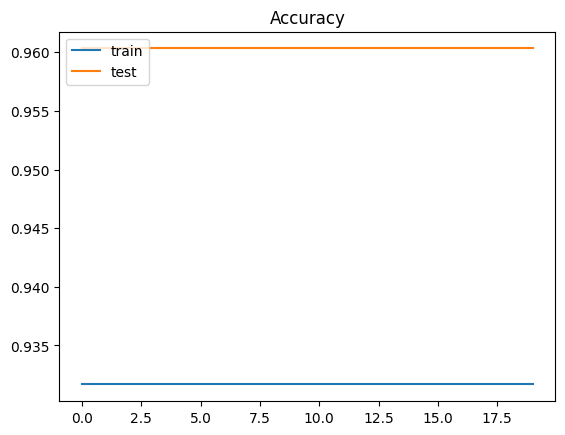

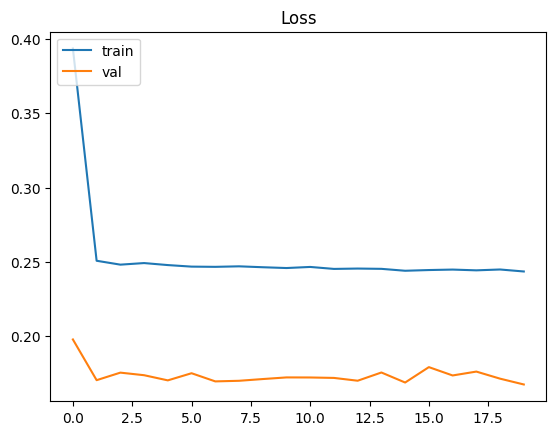

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Oversampling

- Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE    # ***

data = pd.read_csv("data.csv")
data.info()
data['Pass.Fail'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        1567 non-null   float64
 1   X86        1567 non-null   float64
 2   X87        1567 non-null   float64
 3   X88        1567 non-null   float64
 4   X113       1567 non-null   float64
 5   X115       1567 non-null   float64
 6   X116       1567 non-null   float64
 7   X117       1567 non-null   float64
 8   X119       1567 non-null   float64
 9   X120       1567 non-null   float64
 10  X156       1567 non-null   float64
 11  X221       1567 non-null   float64
 12  X222       1567 non-null   float64
 13  X223       1567 non-null   float64
 14  X248       1567 non-null   float64
 15  X250       1567 non-null   float64
 16  X251       1567 non-null   float64
 17  X252       1567 non-null   float64
 18  X254       1567 non-null   float64
 19  X255       1567 non-null   float64
 20  X291    

Pass.Fail
0    1463
1     104
Name: count, dtype: int64

In [ ]:
data[~data.applymap(np.isreal).all(1)]
data = data.fillna(data.median())
data.describe().transpose()
data.groupby(["Pass.Fail"]).count()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X526,X527,X570,X571,X572,X573,X574,X575,X576,X577
Pass.Fail,,,,,,,,,,,,,,,,,,,,,
0,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
1,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104


 - Up sampling

In [ ]:
array = data.values
X = array[:,0:48] # select all rows and first 8 columns which are the attributes
Y = array[:,48]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before UpSampling, counts of label '1': 81
Before UpSampling, counts of label '0': 1015 



In [ ]:
sm = SMOTE(sampling_strategy = 0.5 ,k_neighbors = 3, random_state=1)     # *** sampling_strategy
#Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)        # *** .fit_resample

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After UpSampling, counts of label '1': 507
After UpSampling, counts of label '0': 1015 

After UpSampling, the shape of train_X: (1522, 48)
After UpSampling, the shape of train_y: (1522,) 



In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train_res), columns = data.columns[0:48] )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = data.columns[0:48] )

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train_res, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)


In [ ]:
# 모델 정의하기 --- (*3)
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(48,)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=20,
    verbose=1,
    validation_split=0.1)


Epoch 1/20
43/43 [==============================] - 1s 8ms/step - loss: 0.6870 - accuracy: 0.6501 - val_loss: 0.7335 - val_accuracy: 0.0000e+00
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7414 - val_loss: 0.8418 - val_accuracy: 0.0000e+00
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7414 - val_loss: 1.3284 - val_accuracy: 0.0000e+00
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7414 - val_loss: 1.4154 - val_accuracy: 0.0000e+00
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7414 - val_loss: 1.3229 - val_accuracy: 0.0000e+00
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7414 - val_loss: 1.3226 - val_accuracy: 0.0000e+00
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.7414 - val_loss: 1.2709 - val_accuracy: 0.0

In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


15/15 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9512
정답률= 0.9511677026748657 loss= 0.2325087934732437


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
pred = np.argmax( model.predict( X_test), axis=1 )
y_test = np.argmax( y_test, axis=1 )
print( classification_report( y_test, pred ) )

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       448
           1       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Tree model    # 아래부터는 시험에 나오지 않아요

In [ ]:
array = data.values
X = array[:,0:48] # select all rows and first 8 columns which are the attributes
Y = array[:,48]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
sm = SMOTE(sampling_strategy = 0.5 ,k_neighbors = 3, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train_res), columns = data.columns[0:48] )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = data.columns[0:48] )

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
model.fit( X_train, y_train_res)
print(model.score(X_test, y_test))

from sklearn.metrics import classification_report
print( classification_report( y_test, model.predict(X_test) ) )

0.7855626326963907
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       448
         1.0       0.07      0.26      0.11        23

    accuracy                           0.79       471
   macro avg       0.51      0.54      0.49       471
weighted avg       0.91      0.79      0.84       471

